In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [21]:
df = pd.read_csv('Titanic-Dataset.csv')
print(df.shape)
print(df.head(5))


(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [22]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [23]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df['Sex'] = df['Sex'].map({'male':1,'female':0}).astype(int)

In [25]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [27]:
df['Embarked'].fillna("S",inplace=True)
df =pd.get_dummies(df,columns=['Embarked'])
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.000000      1   
2                               Heikkinen, Miss. Laina    0  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.000000      1   
4                             Allen, Mr. William Henry    1  35.000000      0   
..                                                 ...  .

In [28]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
df2 = df[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare','Embarked_C', 'Embarked_Q','Embarked_S']]
df2.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [31]:
X = df2.iloc[:,:].values
y = df['Survived'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(df1)

     Actual  Predicted
0         0          0
1         0          0
2         0          0
3         1          1
4         1          1
..      ...        ...
174       1          1
175       0          0
176       1          1
177       0          0
178       0          0

[179 rows x 2 columns]


In [34]:
acc = accuracy_score(y_test,y_pred)
print("Accuracy is: ",acc)

Accuracy is:  0.7821229050279329


In [35]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn,fp,fn,tp)
print(" ")
print("True Positive value is: ",tp)
print("True Negative value is: ",tn)
print("False Positive value is: ",fp)
print("False Negative value is: ",fn)

92 18 21 48
 
True Positive value is:  48
True Negative value is:  92
False Positive value is:  18
False Negative value is:  21


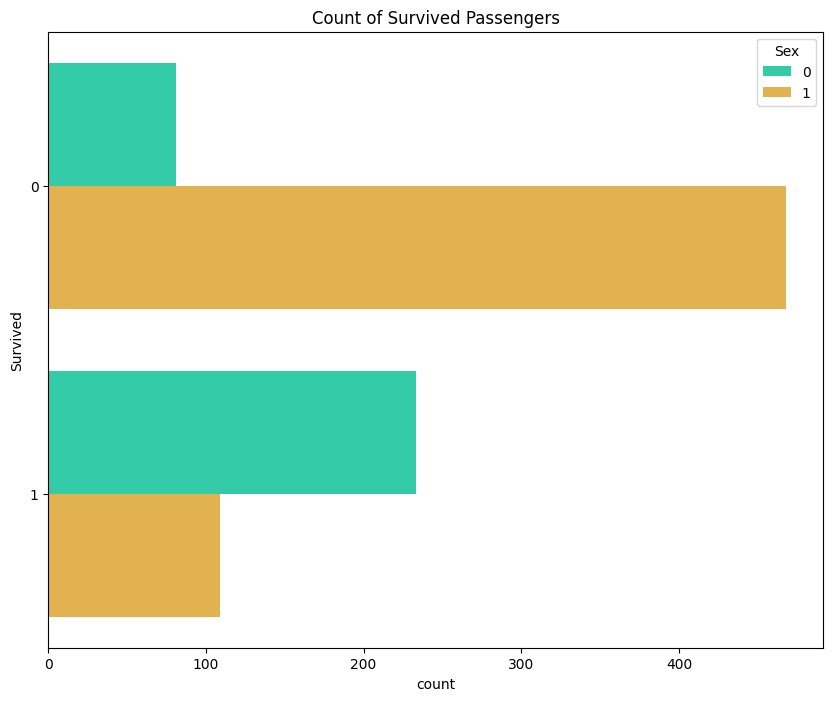

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.countplot(y="Survived", data=df, palette="turbo",hue="Sex")
plt.title('Count of Survived Passengers')
plt.show()